In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

## Part I - Preporcessing Dataset for Political Power

#### Preprocessing of dataset about population and voting percantage

In [275]:
# combining the data in each year into one data frame
years = [2010, 2012, 2014, 2016, 2018]
df_voting_population = pd.DataFrame()

for y in years:
    df = pd.read_csv('data/table04b_{}.csv'.format(y), skiprows=3)
    df = df[0:572]
    # unify the column name of the data frame
    columns_name = ['State', 'Race', 'Total population', 'Total citizen population',
               'Total registered', 'Percent registered (Total)', 'Margin of error 1', 'Percent registered (Citizen)',
               'Margin of error 1', 'Total voted', 'Percent voted (Total)', 'Margin of error 1', 'Percent voted (Citizen)',
               'Margin of error 1']
    columns_mapping = {}
    for i in range(len(columns_name)):
        columns_mapping[df.columns[i]] = columns_name[i]
    df = df.rename(columns=columns_mapping)
    df = df[columns_name]
    # change NaN in the row
    for i in range(df.shape[0]):
        if not pd.isna(df['State'][i]):
            state_name = df.loc[i]['State']
        else:
            df.loc[i]['State'] = state_name
    # for the column 'Race', we only need data that is 'total', 'black', 'white', 'hispanic'
    df = df.loc[(df['Race'] == 'Total') | (df['Race'] == 'White alone') | (df['Race'] == 'Black alone') | (df['Race'] == 'Hispanic (of any race)')]
    df.loc[df['Race'] == 'White alone', 'Race'] = 'White'
    df.loc[df['Race'] == 'Black alone', 'Race'] = 'Black'
    df.loc[df['Race'] == 'Hispanic (of any race)', 'Race'] = 'Hispanic'
    # add year to the dataframe
    df.insert(loc=0, column='Year', value=[y for _ in range(df.shape[0])])
    # combine the dataframe in each year
    df_voting_population = pd.concat([df_voting_population, df])
df_voting_population[:30]

,Year,State,Race,Total population,Total citizen population,Total registered,Percent registered (Total),Margin of error 1,Margin of error 1,Margin of error 1,...,Percent voted (Total),Margin of error 1,Margin of error 1,Margin of error 1,Margin of error 1,Percent voted (Citizen),Margin of error 1,Margin of error 1,Margin of error 1,Margin of error 1
0,2010,US,Total,"229,690","210,800","137,263",59.8,0.3,0.3,0.3,...,41.8,0.3,0.3,0.3,0.3,45.5,0.3,0.3,0.3,0.3
3,2010,US,White,"185,804","172,447","114,482",61.6,0.3,0.3,0.3,...,43.4,0.3,0.3,0.3,0.3,46.7,0.3,0.3,0.3,0.3
5,2010,US,Black,"27,396","25,632","16,101",58.8,1,1,1,...,40.7,1,1,1,1.1,43.5,1,1,1,1.1
7,2010,US,Hispanic,"32,457","21,285","10,982",33.8,1.2,1.5,1,...,20.5,1.2,1.5,1,1.4,31.2,1.2,1.5,1,1.4
11,2010,ALABAMA,Total,"3,526","3,420","2,224",63.1,2.4,2.4,2.5,...,42.8,2.4,2.4,2.5,2.5,44.1,2.4,2.4,2.5,2.5
14,2010,ALABAMA,White,"2,611","2,521","1,612",61.7,2.8,2.8,2.8,...,42,2.8,2.8,2.8,2.9,43.5,2.8,2.8,2.8,2.9
16,2010,ALABAMA,Black,868,868,599,69,5.6,5.6,6,...,46.4,5.6,5.6,6,6,46.4,5.6,5.6,6,6
18,2010,ALABAMA,Hispanic,142,65,34,23.6,16.5,28.6,11.7,...,10.2,16.5,28.6,11.7,23.8,22.1,16.5,28.6,11.7,23.8
22,2010,ALASKA,Total,498,478,317,63.8,2.5,2.6,2.6,...,48.6,2.5,2.6,2.6,2.7,50.7,2.5,2.6,2.6,2.7
25,2010,ALASKA,White,385,375,262,68.2,2.8,2.8,3,...,54.3,2.8,2.8,3,3,55.7,2.8,2.8,3,3


#### Preprocessing of dataset about wealth and education

In [97]:
## step1 - load data
df_wealth_education = pd.read_csv('data/mydata.csv', index_col=0)
# Columns needed: YEAR, STATEICP, RACE, EDUC, INCTOT
df_wealth_education = df_wealth_education[['YEAR', 'STATEICP', 'RACE', 'EDUC', 'INCTOT']]
# Rename the columns
columns_mapping = {}
columns_name = ['Year', 'State', 'Race', 'Education', 'Income']
for i in range(len(columns_name)):
    columns_mapping[df_wealth_education.columns[i]] = columns_name[i]
df_wealth_education = df_wealth_education.rename(columns=columns_mapping)
df_wealth_education

E:\Program Files (x86)\Anaconda\envs\pytorch\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,State,Race,Education,Income
1,2010,41,1,6,7500.0
2,2010,41,1,11,17000.0
3,2010,41,1,7,13000.0
4,2010,41,1,0,9999999.0
5,2010,41,1,7,29400.0
...,...,...,...,...,...
15678354,2018,68,1,1,9999999.0
15678355,2018,68,1,1,9999999.0
15678356,2018,68,1,7,18500.0
15678357,2018,68,1,6,11500.0


For this dataset, we need to translate their code to true value, and here are the code tables:

*Code table for state*

| Value |1|	2	|3	|4|	5	|6	|11	|12	|13	|14|21|22|23|24|
|---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Label|	Connecticut|Maine|Massachusetts|New Hampshire|Rhode Island|Vermont| Delaware|New Jersey|New York|Pennsylvania|Illinois|Indiana	|Michigan|Ohio|
|**Value**|25|31|32|33|34|35|36|37|40|41|42|43|44|45|
|Label|Wisconsin|	Iowa|	Kansas|	Minnesota|	Missouri|	Nebraska|	North Dakota|	South Dakota|	Virginia|	Alabama|	Arkansas|	Florida	|Georgia	|Louisiana
|**Value**|46|47|48|49|51|52|53|54|56|61|62|63|64|65|
|Label|Mississippi	|North| Carolina	|South Carolina|	Texas|	Kentucky	|Maryland	|Oklahoma|	Tennessee|	West Virginia|	Arizona	Colorado	|Idaho	|Montana	|Nevada|
|**Value**|66|	67|	68	|71|	72	|73	|81|	82|	83	|96	|97	|98|	99| |
|Label|New Mexico|	Utah|	Wyoming|	California|	Oregon	|Washingto|	Alaska|	Hawaii|	Puerto Rico|	State groupings (1980 Urban/rural sample)|	Military/Mil. Reservations|	District of Columbia|	State not identified| |

*Code table for race*

|Value	|1	|2	|3	|4	|5	|6|	7	|8	|9|
|---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Label|	White|	Black/African American/Negro|	American Indian or Alaska Native|	Chinese	|Japanese|	Other Asian or Pacific Islander|	Other race, nec|	Two major races|	Three or more major races|

*Code table for education*

| Value   | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10 | 11 |
|---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Label	| Nursery school to grade 4| Grade 5, 6, 7, or 8 | Grade 9 | Grade 10 | Grade 11 | Grade 12 | 1 year of college | 2 years of college | 3 years of college | 4 years of college |5+ years of college |

*Code table for income*

| Value   | -009995  | -000001 | 0000000  | 0000001  | 9999999 | others |
|---|:---:|:---:|:---:|:---:|:---:|:---:|
| Label	| -\$9,900 (1980) | Net loss (1950) | None | $1 or break even (2000, 2005-onward ACS and PRCS) | N/A| Normal Income|


In [108]:
## step2.1 - dropout rows that has invalid income value
df1 = df_wealth_education.drop(index=df.loc[df_wealth_education.Income<=1].index)
df2 = df1.drop(index=df.loc[df_wealth_education.Income>=999999].index)

## step2.2 - binarize the value of Education by college rate
#   We use '1' to indicate 'one or more year of college', and '0' otherwise
df2.loc[df2['Education']<=6, 'Education'] = 0
df2.loc[df2['Education']>=7, 'Education'] = 1
df2

,Year,State,Race,Education,Income
1,2010,41,1,0,7500.0
2,2010,41,1,1,17000.0
3,2010,41,1,1,13000.0
5,2010,41,1,1,29400.0
6,2010,41,1,1,28000.0
...,...,...,...,...,...
15678351,2018,68,1,0,42100.0
15678352,2018,68,1,1,47500.0
15678356,2018,68,1,1,18500.0
15678357,2018,68,1,0,11500.0


In [155]:
## step3 - merge all the samples that have the same 'year', 'state' and 'race'
#   For education, we average the college rate of all samples
#   For income, we pick medium value 
df3 = df2.groupby(['Year', 'State', 'Race']).agg('mean')
df3['Income'] = df2.groupby(['Year', 'State', 'Race']).agg('median')['Income']
# renew index
df3.insert(loc=0, column='Year', value=[ysr[0] for ysr in df3.index])
df3.insert(loc=1, column='State', value=[ysr[1] for ysr in df3.index])
df3.insert(loc=2, column='Race', value=[ysr[2] for ysr in df3.index])
df3.index = np.arange(df3.shape[0])
df3

,Year,State,Race,Education,Income
0,2010,1,1,0.575076,35000.0
1,2010,1,2,0.414773,22450.0
2,2010,1,3,0.428571,20000.0
3,2010,1,4,0.781095,46000.0
4,2010,1,5,0.750000,37000.0
...,...,...,...,...,...
2283,2018,98,5,1.000000,166000.0
2284,2018,98,6,0.904192,63000.0
2285,2018,98,7,0.495050,32000.0
2286,2018,98,8,0.846715,55000.0


In [177]:
## step4 - translate the code for 'State' and 'Race'
# translate the code for 'State'
code_list = ['1', '2', '3', '4', '5', '6', '11', '12', '13', '14', '21', '22', '23', '24', '25',
             '31', '32', '33', '34', '35', '36', '37', '40', '41', '42', '43', '44', '45', '46',
             '47', '48', '49', '51', '52', '53', '54', '56', '61', '62', '63', '64', '65', '66', 
             '67', '68', '71', '72', '73', '81', '82', '83', '96', '97', '98', '99']
state_list = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
             'Delaware', 'New Jersey', 'New York', 'Pennsylvania', 'Illinois', 'Indiana', 'Michigan', 'Ohio',
             'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota',
             'Virginia', 'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina',
             'South Carolina', 'Texas', 'Kentucky', 'Maryland', 'Oklahoma', 'Tennessee', 'West Virginia', 'Arizona',
             'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'California', 'Oregon',
             'Washington', 'Alaska', 'Hawaii', 'Puerto Rico', 'State groupings (1980 Urban/rural sample)',
             'Military/Mil. Reservations', 'District of Columbia', 'State not identified']
mapping = {}
for c, s in zip(code_list, state_list):
    mapping[c] = s
    
df4 = df3.copy()
for i in range(df3.shape[0]):
    c = df3.loc[i]['State']
    df4.loc[i, 'State'] = mapping[str(int(c))]
# for race, we only leave 'Black' and 'White', i.e., only keep the data with 'Race' <= 2
df4 = df4.loc[df4['Race'] <= 2]
df4.loc[df4['Race'] == 1, 'Race'] = 'White'
df4.loc[df4['Race'] == 2, 'Race'] = 'Black'
df4.index = np.arange(df4.shape[0])
df_wealth_education = df4
df_wealth_education

,Year,State,Race,Education,Income
0,2010,Connecticut,White,0.575076,35000.0
1,2010,Connecticut,Black,0.414773,22450.0
2,2010,Maine,White,0.468618,23700.0
3,2010,Maine,Black,0.388060,12500.0
4,2010,Massachusetts,White,0.592768,32500.0
...,...,...,...,...,...
505,2018,Alaska,Black,0.597826,30000.0
506,2018,Hawaii,White,0.671066,40000.0
507,2018,Hawaii,Black,0.566138,34000.0
508,2018,District of Columbia,White,0.922500,75000.0


In [276]:
# save data
df_voting_population.to_csv('data/df_voting_population.csv')
df_wealth_education.to_csv('data/df_wealth_education.csv')

#### End of Preprocessing
After preprocessing, we finally get two dataframe, 'df_voting_population' and 'df_wealth_education'.   
The fisrt one records the **population and voting percentage** of people in US, *per year per race and per state*.  
The Second one records the **education level and Income** of people in US, *per year per race and per state*  

## Part II - Factor Analysis

In [3]:
from sklearn.decomposition import FactorAnalysis

In [552]:
# merge two datafames
df_population = pd.read_csv('data/df_voting_population.csv')
df_wealth_edu = pd.read_csv('data/df_wealth_education.csv')

df_wealth_edu['State'] = df_wealth_edu['State'].str.upper()
df_wealth_edu = df_wealth_edu[['Year', 'State', 'Race', 'Education', 'Income']]

df_population = df_population[['year', 'State', 'Race', 'Total population', 'Total voted']]
df_population.rename(columns={'year': 'Year'}, inplace=True)
df_population['Total population'] = df_population['Total population'].str.replace(',', '').astype(int)
df_population['Total voted'] = df_population['Total voted'].str.replace(',', '').replace('-', 0).astype(int)

# normalize for population and voted population to percentage
df_population.loc[df_population['Race']=='White', 'Total population'] = np.array(df_population.loc[df_population['Race']=='White']['Total population'])/np.array(df_population.loc[df_population['Race']=='Total']['Total population'])
df_population.loc[df_population['Race']=='Black', 'Total population'] = np.array(df_population.loc[df_population['Race']=='Black']['Total population'])/np.array(df_population.loc[df_population['Race']=='Total']['Total population'])

df_population.loc[df_population['Race']=='White', 'Total voted'] = np.array(df_population.loc[df_population['Race']=='White']['Total voted'])/np.array(df_population.loc[df_population['Race']=='Total']['Total voted'])
df_population.loc[df_population['Race']=='Black', 'Total voted'] = np.array(df_population.loc[df_population['Race']=='Black']['Total voted'])/np.array(df_population.loc[df_population['Race']=='Total']['Total voted'])

# normalize income
df_wealth_edu.loc[df_wealth_edu['Race']=='Black', 'Income'] = np.array(df_wealth_edu.loc[df_wealth_edu['Race']=='Black']['Income'])/np.array(df_wealth_edu.loc[df_wealth_edu['Race']=='White']['Income'])
df_wealth_edu.loc[df_wealth_edu['Race']=='White', 'Income'] = np.array(df_wealth_edu.loc[df_wealth_edu['Race']=='White']['Income'])/np.array(df_wealth_edu.loc[df_wealth_edu['Race']=='White']['Income'])

df_wealth_edu = df_wealth_edu.set_index(['Year', 'State', 'Race'])
df_population = df_population.set_index(['Year', 'State', 'Race'])

df = df_population.join(df_wealth_edu, how='inner')
df = df.drop([(yr[0], 'DISTRICT OF COLUMBIA', yr[1])   for yr in df.loc[:, 'DISTRICT OF COLUMBIA', :].index])

# start factor analysis
transformer = FactorAnalysis(n_components=1, random_state=0)

df['Political Power'] = transformer.fit_transform(df)
df.to_csv('data/political_power.csv')
df

Total population  Total voted  Education    Income  \
Year State         Race                                                        
2010 ALABAMA       White          0.740499     0.726972   0.475073  1.000000   
                   Black          0.246171     0.267064   0.384688  0.622407   
     ALASKA        White          0.773092     0.863636   0.594025  1.000000   
                   Black          0.048193     0.028926   0.657895  0.959554   
     ARIZONA       White          0.883254     0.892166   0.563546  1.000000   
...                                    ...          ...        ...       ...   
2018 WEST VIRGINIA Black          0.034851     0.019672   0.397094  0.672000   
     WISCONSIN     White          0.889991     0.927233   0.509030  1.000000   
                   Black          0.059513     0.039625   0.427223  0.562500   
     WYOMING       White          0.948837     0.972727   0.549745  1.000000   
                   Black          0.011628     0.009091   0.500000  0.845313   

                          Political Power  
Year State         Race                    
2010 ALABAMA       White         0.710460  
                   Black        -0.545138  
     ALASKA        White         0.933689  
                   Black        -1.112410  
     ARIZONA       White         1.114751  
...                                   ...  
2018 WEST VIRGINIA Black        -1.146280  
     WISCONSIN     White         1.169601  
                   Black        -1.088975  
     WYOMING       White         1.306449  
                   Black        -1.188120  

[500 rows x 5 columns]

In [540]:
print('This factor explains {:.4f}% of the variance across the four variables'.format(np.exp(transformer.score(df[['Total population', 'Total voted', 'Education', 'Income']]))))

This factor explains 79.0746% of the variance across the four variables


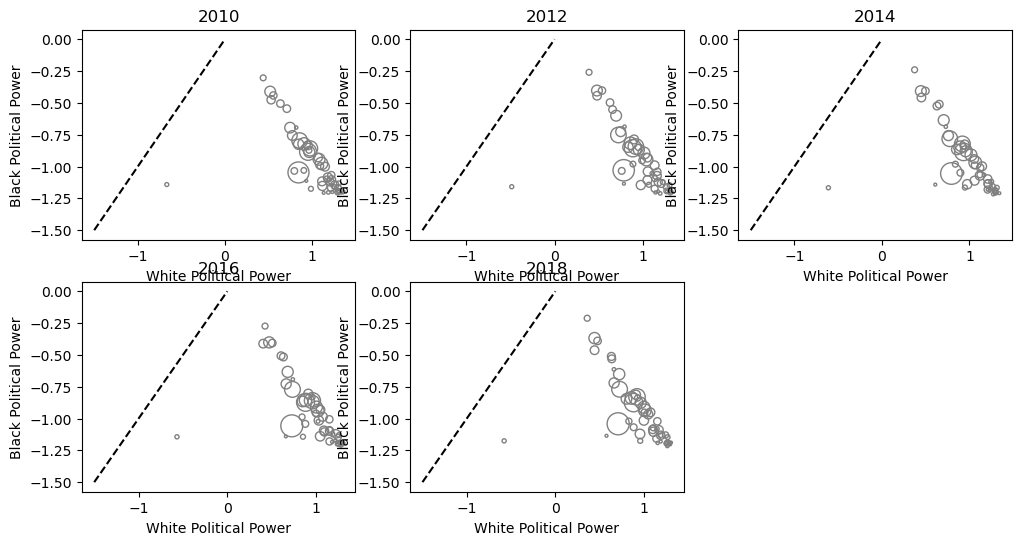

In [563]:
state_list = []
for ysr in df.loc[2010, :, 'White'].index:
    state_list.append(ysr[1])
    
years = [2010, 2012, 2014, 2016, 2018]

plt.style.use('default')
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    y = years[i]
    plt.scatter(df.loc[y, :, 'White']['Political Power'], df.loc[y, :, 'Black']['Political Power'], 
                s=df_population.loc[y, state_list, 'Total']['Total population']/120,
               facecolors='none', edgecolors='grey')
    plt.plot(np.linspace(-1.5, 0), np.linspace(-1.5, 0), 'k--')
    plt.xlabel('White Political Power')
    plt.ylabel('Black Political Power')
    plt.title(y)

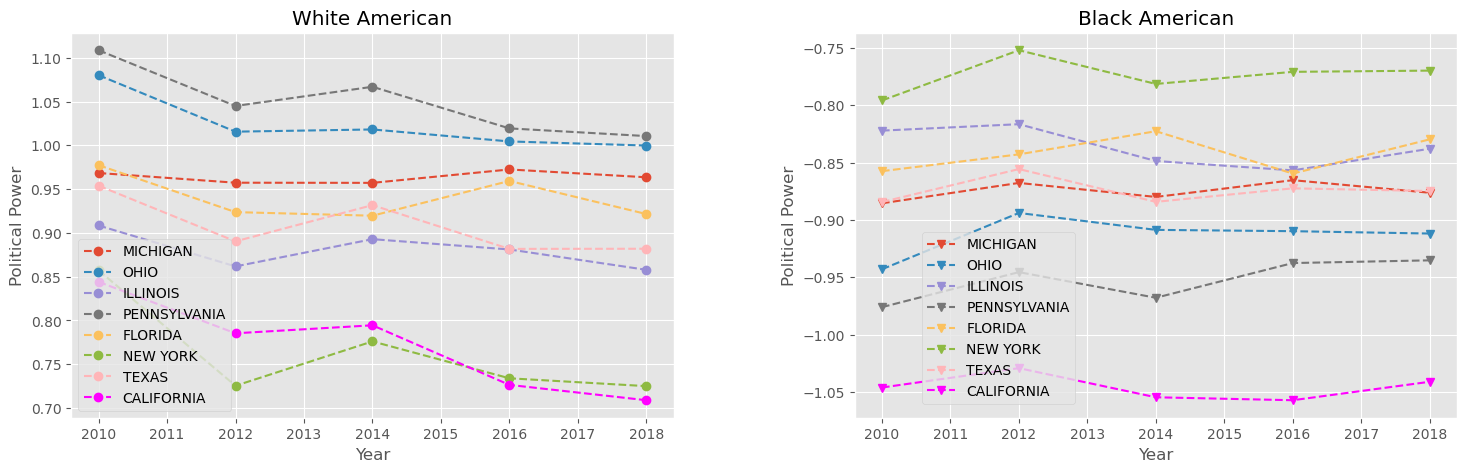

In [565]:
# plot the curve
num_to_show = 8
state_list_show = np.array(state_list)
state_list_show = state_list_show[np.argsort(df_population.loc[2010, state_list, 'Total']['Total population'])][-num_to_show:]
state_list_show

plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.subplot(121)
for i in range(num_to_show):
    s = state_list_show[i]
    color = 'C'+str(i) if i <= 6 else ['magenta', 'cyan'][i-7]
    plt.plot(df.loc[:, s, 'White']['Political Power'], 'o--', c=color, label=s)
    plt.xlabel('Year')
    plt.ylabel('Political Power')
    plt.title('White American')
    plt.legend()
    
plt.subplot(122) 
for i in range(num_to_show):
    s = state_list_show[i]
    color = 'C'+str(i) if i <= 6 else ['magenta', 'cyan'][i-7]
    plt.plot(df.loc[:, s, 'Black']['Political Power'], 'v--', c=color, label=s)
    plt.xlabel('Year')
    plt.ylabel('Political Power')
    plt.title('Black American')
    plt.legend(bbox_to_anchor=(0.1, 0.5))


plt.subplots_adjust(left=0.005, bottom=None, right=0.995, top=None,
                wspace=0.3, hspace=None)
plt.savefig('figures/political_power.png')

## Part III - Political Power v.s. Search Rate

In [641]:
from matplotlib import cm
# load dafa for search rate
df_search_rate = pd.read_csv('data/marijuana_search_rates.csv')
df_search_rate

,state,driver_race,pre_legalization,quarter,search_rate
0,AZ,white,False,2013/2/15,0.032350
1,AZ,white,False,2013/5/15,0.033455
2,AZ,white,False,2013/8/15,0.033255
3,AZ,white,False,2013/11/15,0.031830
4,AZ,white,False,2014/2/15,0.030485
...,...,...,...,...,...
781,WI,hispanic,True,2011/8/15,0.016410
782,WI,hispanic,True,2011/11/15,0.017816
783,WI,hispanic,True,2012/2/15,0.015735
784,WI,hispanic,True,2012/5/15,0.017952


In [642]:
# Since the date of search_rate ranges in 2011-2015
# We set the corresponding year of political power as 2010, 2012, 2014
df_search_rate.quarter = pd.DatetimeIndex(df_search_rate.quarter)
df_search_rate.insert(0, 'year', np.zeros(df_search_rate.shape[0], dtype=np.int))
df_search_rate.loc[df_search_rate.quarter < np.datetime64('2015-12-31'), 'year'] = 2014
df_search_rate.loc[df_search_rate.quarter < np.datetime64('2013-12-31'), 'year'] = 2012
df_search_rate.loc[df_search_rate.quarter < np.datetime64('2011-12-31'), 'year'] = 2010
df_search_rate
df_search_rate = df_search_rate.drop(columns=['pre_legalization', 'quarter'])

df_search_rate = df_search_rate.groupby(['year', 'state', 'driver_race']).mean()

df_search_rate[:15]

search_rate
year state driver_race             
2010 AZ    black           0.083852
           hispanic        0.099505
           white           0.039377
     CA    black           0.002131
           hispanic        0.001523
           white           0.001172
     CO    black           0.010935
           hispanic        0.008641
           white           0.003976
     FL    black           0.008664
           hispanic        0.004055
           white           0.003377
     MA    black           0.016747
           hispanic        0.018833
           white           0.007816

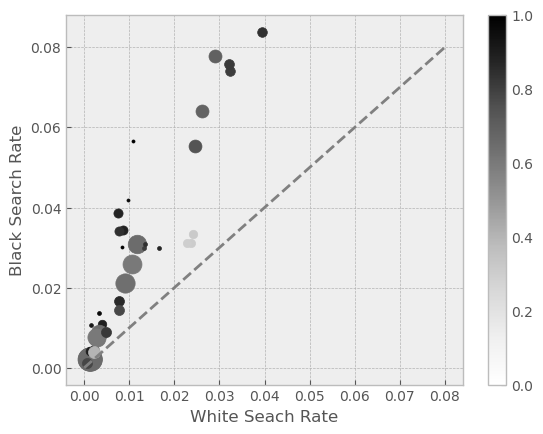

In [664]:
# plot political power. vs search rate,
# the size indicates the population of state,
# and the depth of color indicates (white_political_power - black_political_power)

state_list1 = ['AZ','CA','CO','FL','MA','MT','NC','OH','RI','SC','TX','VT','WA','WI']
state_list2 = ['ARIZONA', 'CALIFORNIA', 'COLORADO', 'FLORIDA', 'MASSACHUSETTS', 'MONTANA', 'NORTH CAROLINA', 
               'OHIO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'TEXAS','VERMONT', 'WASHINGTON', 'WISCONSIN']
x = []
y = []
p = []
s = []

plt.style.use('bmh')
for year in [2010, 2012, 2014]:
    x.append(np.array(df_search_rate.loc[year, :, 'white']))
    y.append(np.array(df_search_rate.loc[year, :, 'black']))
    p.append(np.array(df.loc[year, state_list2, 'White']['Political Power']) 
              - np.array(df.loc[year, state_list2, 'Black']['Political Power']))
    s.append(np.array(df_population.loc[year, state_list2, 'Total']['Total population']))

x = np.concatenate(x, axis=0)
y = np.concatenate(y, axis=0)
p = np.concatenate(p, axis=0)
s = np.concatenate(s, axis=0)

p = (p - np.min(p)) / (np.max(p) - np.min(p))
c_map = cm.get_cmap('Greys', 256)
colors = c_map(p*0.7 + 0.3)

for i in range(x.shape[0]):
    plt.scatter(x[i], y[i], color=colors[i], s=s[i]/100)
plt.plot(np.linspace(0, 0.08), np.linspace(0, 0.08), '--', color='grey')
plt.xlabel('White Seach Rate')
plt.ylabel('Black Search Rate')
plt.colorbar(cm.ScalarMappable(cmap=c_map))
plt.savefig('figures/first_glance.png')

Text(0, 0.5, 'Search rate (%)')

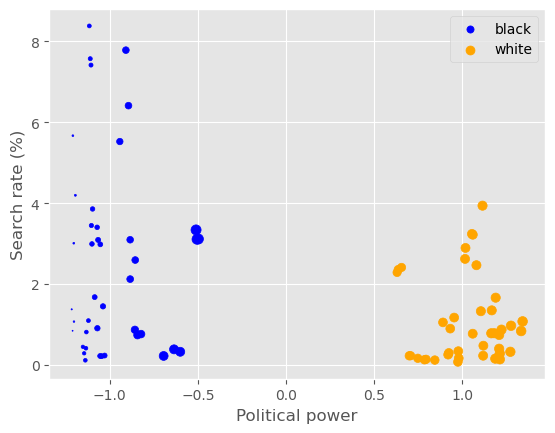

In [654]:
# scatter plot of political power vs. search rate,
# this plot is not clear enough

state_list1 = ['AZ','CA','CO','FL','MA','MT','NC','OH','RI','SC','TX','VT','WA','WI']
state_list2 = ['ARIZONA', 'CALIFORNIA', 'COLORADO', 'FLORIDA', 'MASSACHUSETTS', 'MONTANA', 'NORTH CAROLINA', 
               'OHIO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'TEXAS','VERMONT', 'WASHINGTON', 'WISCONSIN']

plt.style.use('ggplot')
for year in [2010, 2012, 2014]:
    plt.scatter(df.loc[year, state_list2, 'Black']['Political Power'], 
                df_search_rate.loc[year, :, 'black']['search_rate']*100,
                s=df_population.loc[year, state_list2, 'Black']['Total population']*200,
               c='blue')

    plt.scatter(df.loc[year, state_list2, 'White']['Political Power'], 
                df_search_rate.loc[year, :, 'white']['search_rate']*100,
                s=df_population.loc[year, state_list2, 'White']['Total population']*50,
               c='orange')
    
plt.legend(['black', 'white'])
plt.xlabel('Political power')
plt.ylabel('Search rate (%)')

In [656]:
# load data for stop rate
df_stop_rate = pd.read_csv('data/state.csv')[['state', 'subgeography', 'subject_race', 'stop_rate', 'stops_per_year']]
df_stop_rate = df_stop_rate.groupby(['state', 'subject_race']).mean()
df_stop_rate.insert(0, 'race', [idx[1] for idx in df_stop_rate.index])
df_stop_rate.insert(0, 'state', [idx[0] for idx in df_stop_rate.index])
df_stop_rate.index = np.arange(df_stop_rate.shape[0])

df_stop_rate

,state,race,stop_rate,stops_per_year
0,AZ,black,0.115928,2048.727742
1,AZ,hispanic,0.065497,8806.518473
2,AZ,white,0.077444,18642.227790
3,CA,black,0.168701,6180.388195
4,CA,hispanic,0.097376,24931.408320
...,...,...,...,...
58,WA,hispanic,0.094922,2147.761876
59,WA,white,0.127457,16345.458194
60,WI,black,0.032153,170.078903
61,WI,hispanic,0.018971,108.368931


Text(0, 0.5, 'Stop rate (%)')

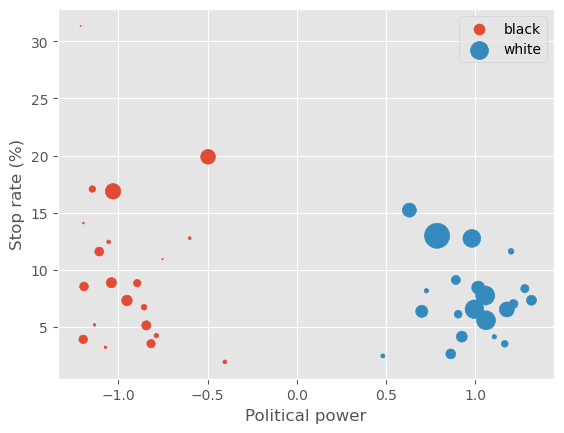

In [660]:
# scatter plot of political power vs. stop rate,
# this plot is not clear enough
state_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
             'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
             'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
             'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
             'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
             'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming']
state_abbrev = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
             'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
             'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
             'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

mapping = {}
for s, s_abbrev in zip(state_list, state_abbrev):
    mapping[s_abbrev] = s

state_show = np.unique(df_stop_rate['state'])
state_show_full = [mapping[s_abbrev].upper() for s_abbrev in state_show]
plt.scatter(df.loc[2012, state_show_full, 'Black']['Political Power'], 
            df_stop_rate.loc[df_stop_rate.race=='black']['stop_rate']*100,
            s=df_stop_rate.loc[df_stop_rate.race=='black']['stops_per_year']/50)

plt.scatter(df.loc[2012, state_show_full, 'White']['Political Power'], 
            df_stop_rate.loc[df_stop_rate.race=='white']['stop_rate']*100,
            s=df_stop_rate.loc[df_stop_rate.race=='white']['stops_per_year']/100)

plt.legend(['black', 'white'])
plt.xlabel('Political power')
plt.ylabel('Stop rate (%)')

## Part IV - Regression Analysis

See p4.ipynb